In [30]:
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def pca(x_train_sc,x_test_sc,n):
    pca=PCA(n_components=n)
    x_train_pca=pca.fit_transform(x_train_sc)
    x_test_pca=pca.transform(x_test_sc)
    variance_ratio=pca.explained_variance_ratio_
    cumsum_variance=np.cumsum(variance_ratio)
    return x_train_pca,x_test_pca,cumsum_variance

In [5]:
def split_scale(indep,dep):
    x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=1/3,random_state=0)
    sc=StandardScaler()
    x_train_sc=sc.fit_transform(x_train)
    x_test_sc=sc.transform(x_test)
    return x_train_sc,x_test_sc,y_train,y_test

In [6]:
def accuracy(model,x_test_pca,y_test):
    y_pred=model.predict(x_test_pca)
    accu=accuracy_score(y_pred,y_test)
    return accu

In [7]:
def log(x_train_pca,y_train,x_test_pca,y_test):
    model=LogisticRegression(max_iter=1000,solver='liblinear')
    model.fit(x_train_pca,y_train)
    accuracy_log=accuracy(model,x_test_pca,y_test)
    return accuracy_log

def dt(x_train_pca,y_train,x_test_pca,y_test):
    model=DecisionTreeClassifier()
    model.fit(x_train_pca,y_train)
    accuracy_dt=accuracy(model,x_test_pca,y_test)
    return accuracy_dt

def svc(x_train_pca,y_train,x_test_pca,y_test):
    model=SVC(kernel='linear')
    model.fit(x_train_pca,y_train)
    accuracy_svc=accuracy(model,x_test_pca,y_test)
    return accuracy_svc

In [31]:
def plot(cumsum_variance):
    plt.plot(cumsum_variance,marker='o')
    plt.show()
    return

In [32]:
def combo(indep,dep,n):
    x_train_sc,x_test_sc,y_train,y_test=split_scale(indep,dep)
    x_train_pca,x_test_pca,cumsum_variance=pca(x_train_sc,x_test_sc,n)
    log_acc=[]
    dt_acc=[]
    svm_acc=[]
    log_mod=log(x_train_pca,y_train,x_test_pca,y_test)
    log_acc.append(log_mod)
    dt_mod=dt(x_train_pca,y_train,x_test_pca,y_test)
    dt_acc.append(dt_mod)
    svm_mod=svc(x_train_pca,y_train,x_test_pca,y_test)
    svm_acc.append(svm_mod)
    result=[log_acc,dt_acc,svm_acc]
    import pandas as pd
    score_table=pd.DataFrame(result,columns=['PCA'],index=['Logistic Regression','Decision Tree','SVM'])
    graph=plot(cumsum_variance)
    #features=pd.DataFrame(best_features,index=['Logistic Regression','Decision Tree'])
    return score_table,cumsum_variance,graph
    #print("\nscore_table:\n",features)
    

In [26]:
import pandas as pd
dataset=pd.read_csv("CKD.csv")
dataset=pd.get_dummies(dataset,drop_first=True)
indep=dataset.drop('classification_yes',axis=1)
dep=dataset['classification_yes']

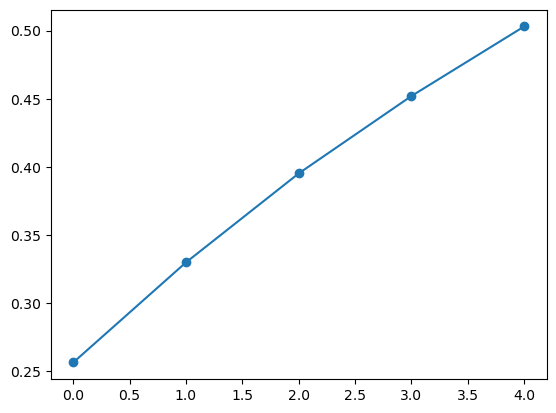

(                          PCA
 Logistic Regression  0.984962
 Decision Tree        1.000000
 SVM                  0.992481,
 array([0.25648691, 0.32989571, 0.39516826, 0.45196141, 0.50296719]),
 None)

In [33]:
combo(indep,dep,5)